In [1]:
pip install hvplot

  Using cached hvplot-0.12.1-py3-none-any.whl.metadata (19 kB)
  Using cached bokeh-3.8.1-py3-none-any.whl.metadata (10 kB)
  Using cached colorcet-3.1.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached holoviews-1.21.0-py3-none-any.whl.metadata (10 kB)
  Using cached panel-1.8.2-py3-none-any.whl.metadata (15 kB)
  Using cached param-2.2.1-py3-none-any.whl.metadata (6.6 kB)
  Using cached xyzservices-2025.10.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached pyviz_comms-3.0.6-py3-none-any.whl.metadata (7.7 kB)
  Using cached linkify_it_py-2.0.3-py3-none-any.whl.metadata (8.5 kB)
  Using cached markdown-3.10-py3-none-any.whl.metadata (5.1 kB)
  Using cached markdown_it_py-4.0.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached mdit_py_plugins-0.5.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached uc_micro_py-1.0.3-py3-none-any.whl.metadata (2.0 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached hvplot-0.12.1-py3-none-any.whl (175 kB)
Using cached param-2.2

In [2]:
pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.2 MB/s  0:00:00


In [2]:
pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.4 MB 2.4 MB/s eta 0:00:43
    --------------------------------------- 1.3/102.4 MB 2.1 MB/s eta 0:00:49
    --------------------------------------- 1.6/102.4 MB 2.0 MB/s eta 0:00:50
    --------------------------------------- 2.1/102.4 MB 2.1 MB/s eta 0:00:48
   - -------------------------------------- 2.6/102.4 MB 2.0 MB/s eta 0:00:49
   - -------------------------------------- 2.9/102.4 MB 2.0 MB/s eta 0:00:50
   - -------------------------------------- 3.4/102.4 MB 2.0 MB/s eta 0:00:50
   - -------------------------------------- 3.7/102.4 MB 2.0 MB/s eta 0:00:50
   - -------------------------------------- 4.2/102.4 MB 2.0 MB/s eta 0:00:50
   - -------------------------------------- 4.5/102.4 MB 2.0 MB/s eta 0:00:50
   - -------------------------------------- 5.0/102.4 MB 1.9 MB/s eta 0:00:51


In [3]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

# Library for Data Manipulation
import numpy as np
import pandas as pd

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

print("==================== Packages Loaded ======================")

# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


In [4]:
employee_data = pd.read_csv(r'IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

In [5]:
# Print top 5 rows in the dataframe.
employee_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,Junior Level,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,Junior Level,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,Entry Level,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,Entry Level,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,Entry Level,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2


In [6]:
# Print bottom 5 rows in the dataframe.
employee_data.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,41,Very High,Junior Level,Laboratory Technician,Very High,Married,2571,12290,4,No,17,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,42,Medium,Mid Level,Healthcare Representative,Low,Married,9991,21457,4,No,15,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,87,Very High,Junior Level,Manufacturing Director,Medium,Married,6142,5174,1,Yes,20,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,63,Medium,Junior Level,Sales Executive,Medium,Married,5390,13243,2,No,14,Excellent,Very High,0,17,3,Good,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,Bachelor,Medical,Medium,Male,82,Very High,Junior Level,Laboratory Technician,High,Married,4404,10228,2,No,12,Excellent,Low,0,6,3,Best,4,3,1,2


In [7]:
# Print the shape of the DataFrame
print("The shape of data frame:", employee_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(employee_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(employee_data.columns))

The shape of data frame: (1470, 31)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 31


LABEL ENCODING

In [8]:
# Convert categorical variables into numerical form. 
label = LabelEncoder()
employee_data["Attrition"] = label.fit_transform(employee_data.Attrition)

In [9]:
 employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

DATA PROCESSING

In [10]:
# Transform categorical data into dummies
dummy_col = [column for column in employee_data.drop('Attrition', axis=1).columns if employee_data[column].nunique() < 20]
data = pd.get_dummies(employee_data, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [11]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


<Axes: >

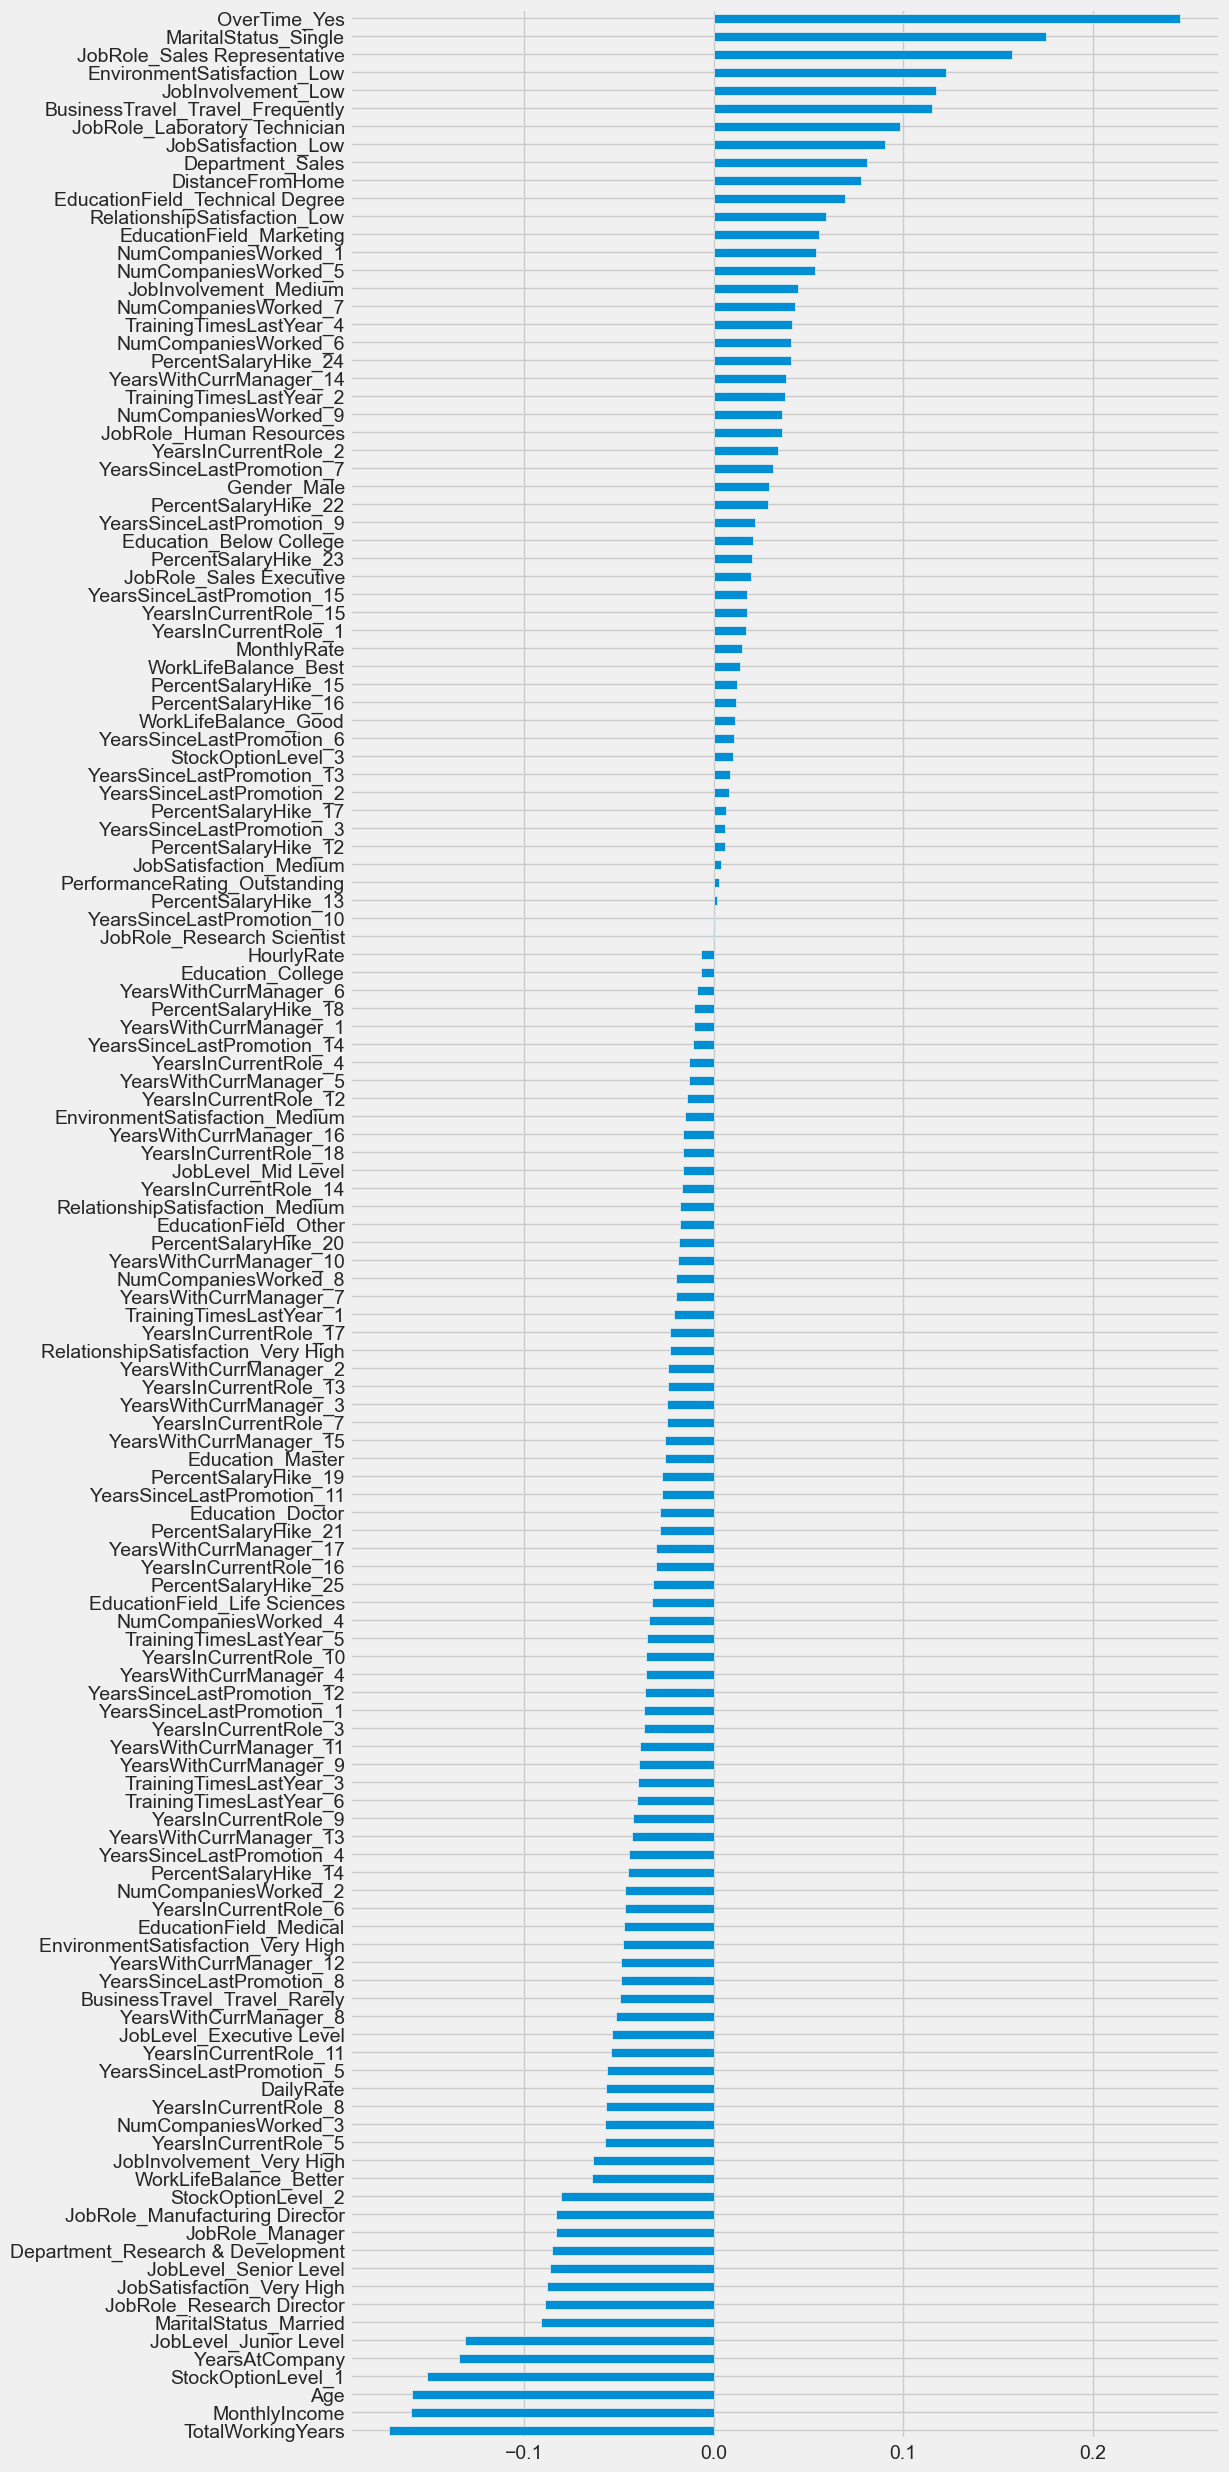

In [12]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [13]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

94

TRAIN AND TEST DATASET

In [14]:
X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [15]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [16]:
y_test.value_counts()[0] / y_test.shape[0]

np.float64(0.8390022675736961)

In [17]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [18]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

LOGISTIC REGRESSION

In [19]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[847  16]
 [ 59 107]]
ACCURACY SCORE:
0.9271
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.934879    0.869919  0.927114     0.902399      0.924399
recall       0.981460    0.644578  0.927114     0.813019      0.927114
f1-score     0.957603    0.740484  0.927114     0.849044      0.922577
support    863.000000  166.000000  0.927114  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[351  19]
 [ 41  30]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.895408   0.612245  0.863946    0.753827      0.849820
recall       0.948649   0.422535  0.863946    0.685592      0.863946
f1-score     0.921260   0.500000  0.863946    0.710630      0.853438
support    370.000000  71.000000  0.863946  441.000000    441.000000


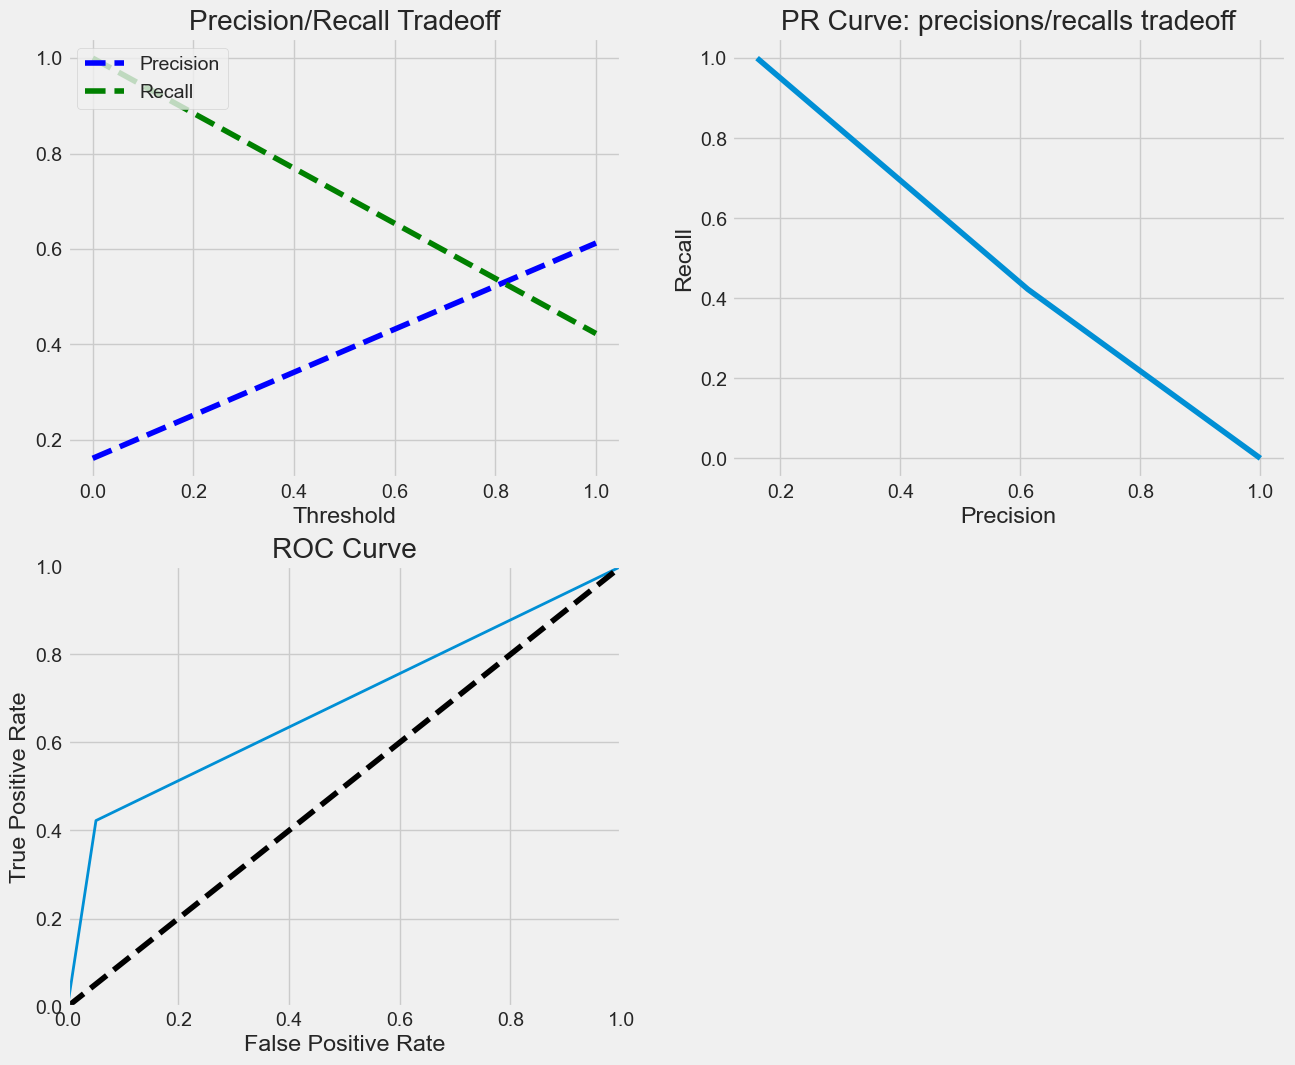

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [21]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

RANDOM FOREST CLASSIFIER

In [22]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[363   7]
 [ 63   8]]
ACCURACY SCORE:
0.8413
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.852113   0.533333   0.84127    0.692723      0.800790
recall       0.981081   0.112676   0.84127    0.546879      0.841270
f1-score     0.912060   0.186047   0.84127    0.549053      0.795174
support    370.000000  71.000000   0.84127  441.000000    441.000000


In [21]:
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [113  53]]
ACCURACY SCORE:
0.8902
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.884221    1.000000  0.890185     0.942111      0.902899
recall       1.000000    0.319277  0.890185     0.659639      0.890185
f1-score     0.938554    0.484018  0.890185     0.711286      0.865227
support    863.000000  166.000000  0.890185  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[365   5]
 [ 65   6]]
ACCURACY SCORE:
0.8413
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.848837   0.545455   0.84127    0.697146      0.799993
recall       0.986486   0.084507   0.84127    0.535497      0.841270
f1-score     0.912500   0.146341   0.84127    0.529421      0.789150
support    370.000000  71.000000   0.84127  441.000000    441.000000


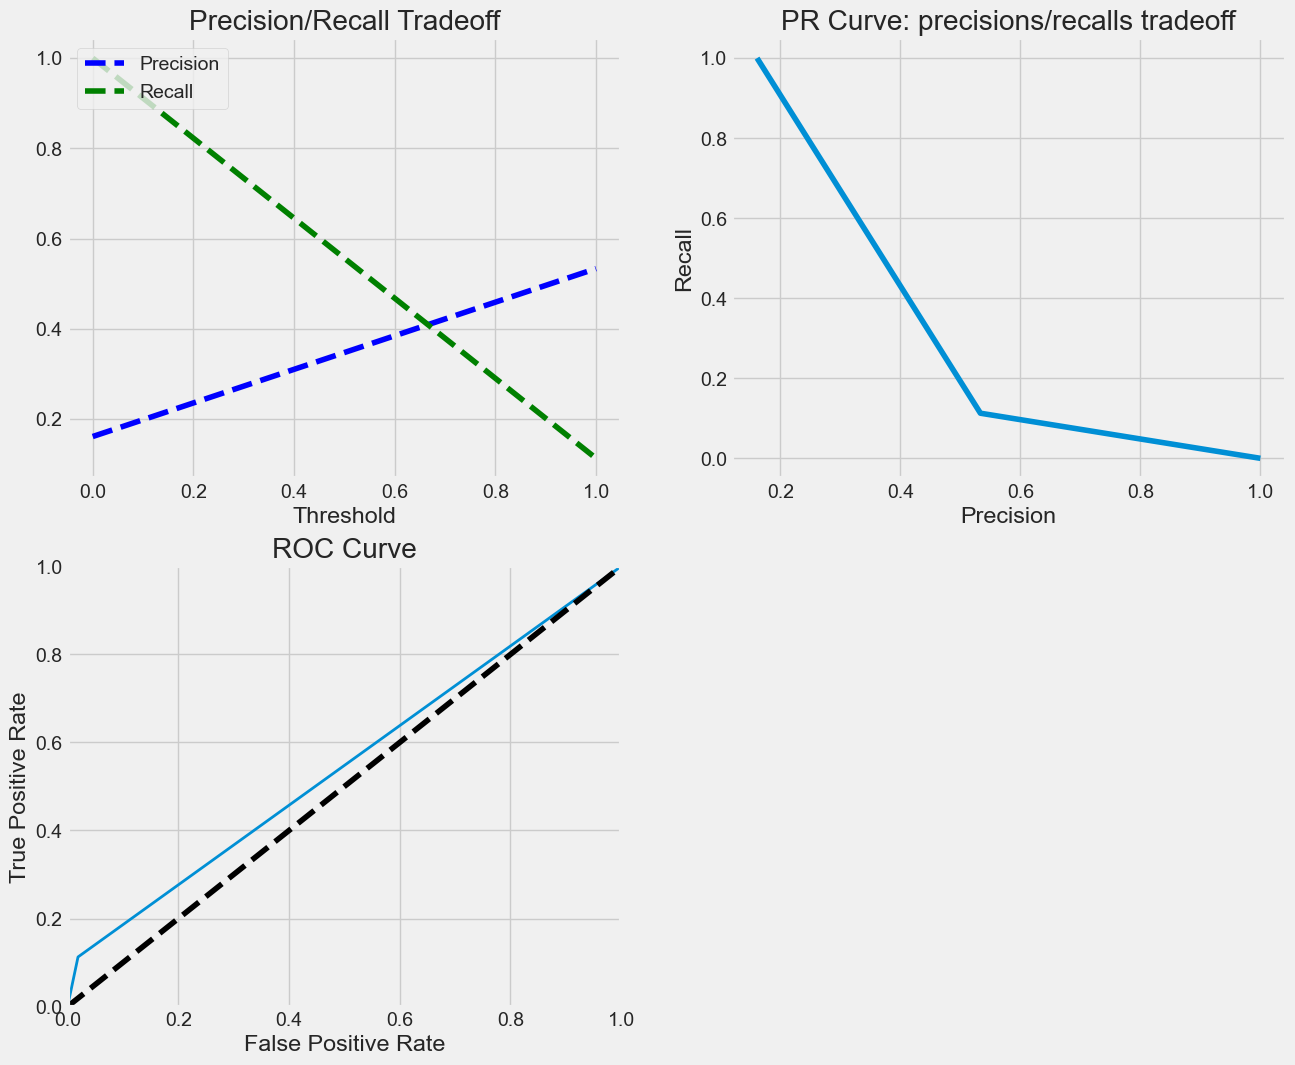

In [23]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [24]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

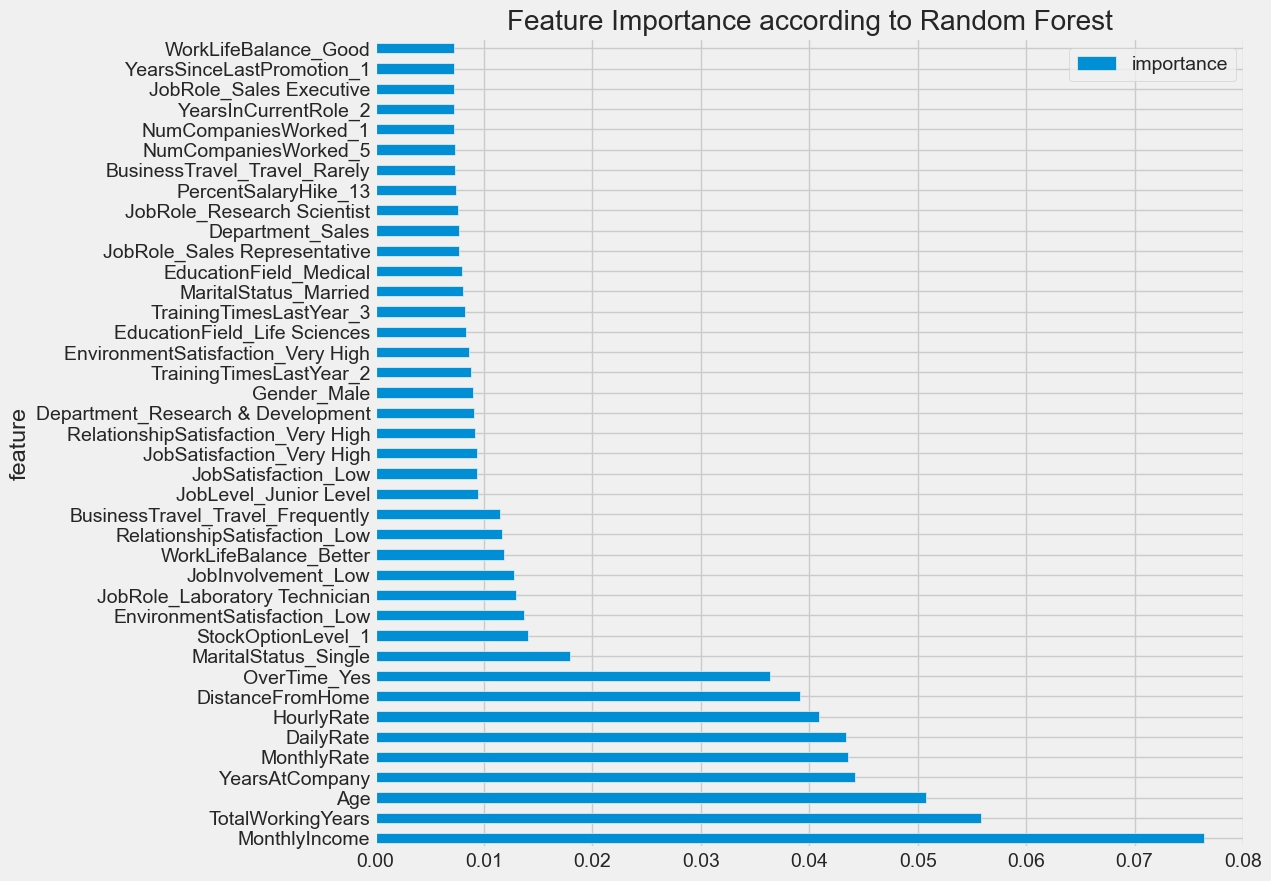

In [25]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

SUPPORT VECTOR MACHINE(SVM)

In [26]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [ 48 118]]
ACCURACY SCORE:
0.9456
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.946844    0.936508  0.945578     0.941676      0.945176
recall       0.990730    0.710843  0.945578     0.850787      0.945578
f1-score     0.968290    0.808219  0.945578     0.888255      0.942467
support    863.000000  166.000000  0.945578  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[347  23]
 [ 44  27]]
ACCURACY SCORE:
0.8481
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887468   0.540000  0.848073    0.713734      0.831526
recall       0.937838   0.380282  0.848073    0.659060      0.848073
f1-score     0.911958   0.446281  0.848073    0.679119      0.836985
support    370.000000  71.000000  0.848073  441.000000    441.000000


In [27]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


,estimator,SVC(random_state=42)
,param_grid,"[{'C': [1, 10, ...], 'kernel': ['linear']}, {'C': [1, 10, ...], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [28]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[861   2]
 [ 65 101]]
ACCURACY SCORE:
0.9349
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.929806    0.980583  0.934888     0.955194      0.937997
recall       0.997683    0.608434  0.934888     0.803058      0.934888
f1-score     0.962549    0.750929  0.934888     0.856739      0.928410
support    863.000000  166.000000  0.934888  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[360  10]
 [ 49  22]]
ACCURACY SCORE:
0.8662
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.880196   0.687500  0.866213    0.783848      0.849172
recall       0.972973   0.309859  0.866213    0.641416      0.866213
f1-score     0.924262   0.427184  0.866213    0.675723      0.844234
support    370.000000  71.000000  0.866213  441.000000    441.000000


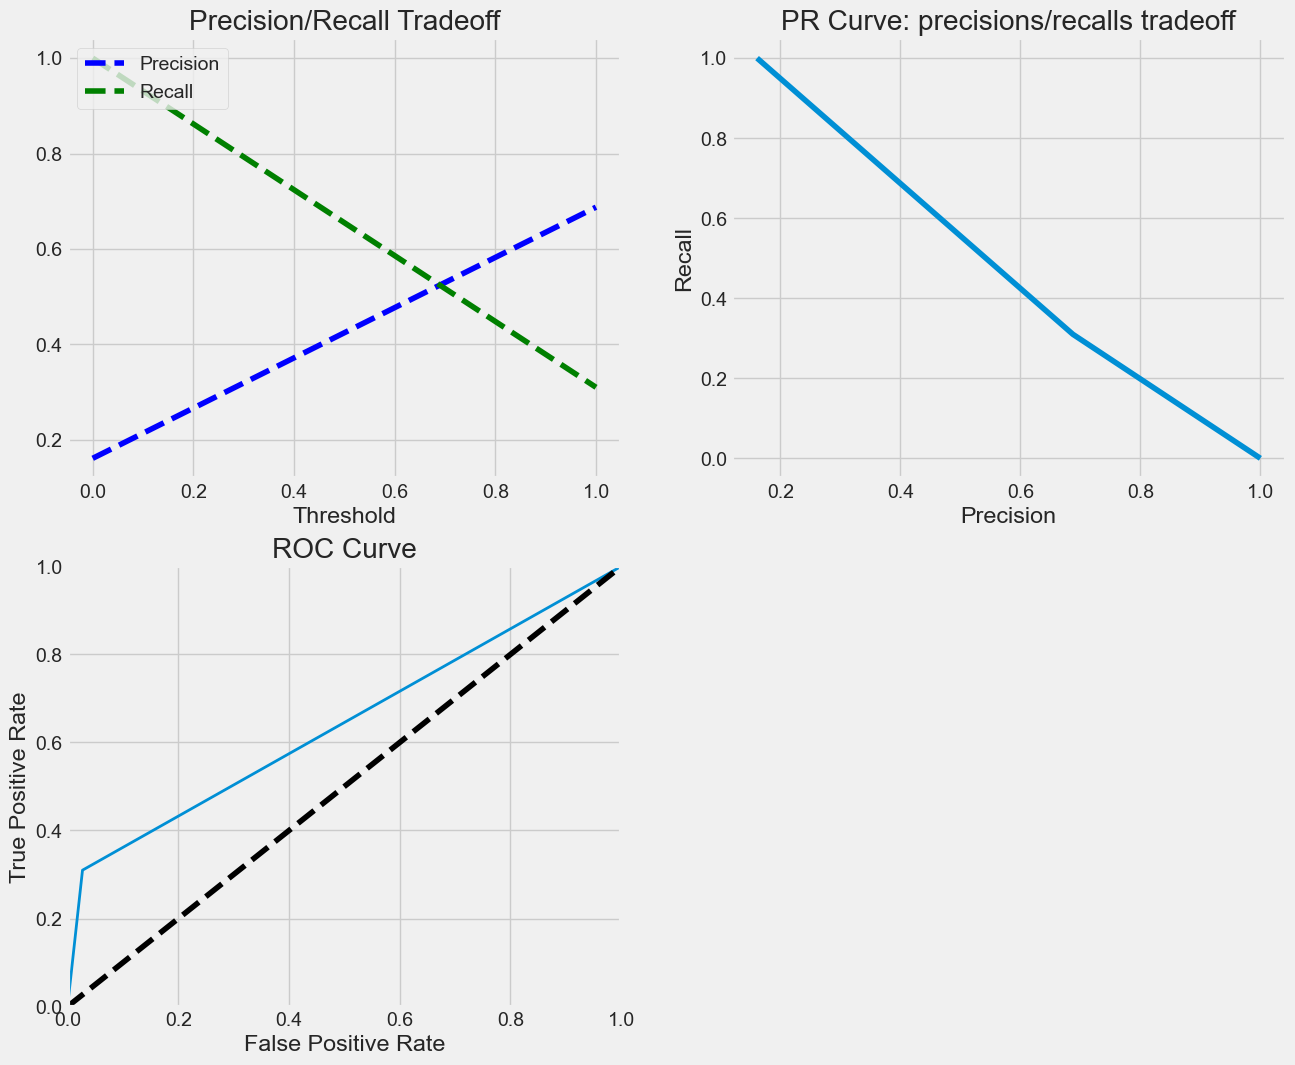

In [29]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [30]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }

XGBOOST CLASSIFIER

In [31]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[357  13]
 [ 53  18]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870732   0.580645   0.85034    0.725688      0.824028
recall       0.964865   0.253521   0.85034    0.609193      0.850340
f1-score     0.915385   0.352941   0.85034    0.634163      0.824832
support    370.000000  71.000000   0.85034  441.000000    441.000000


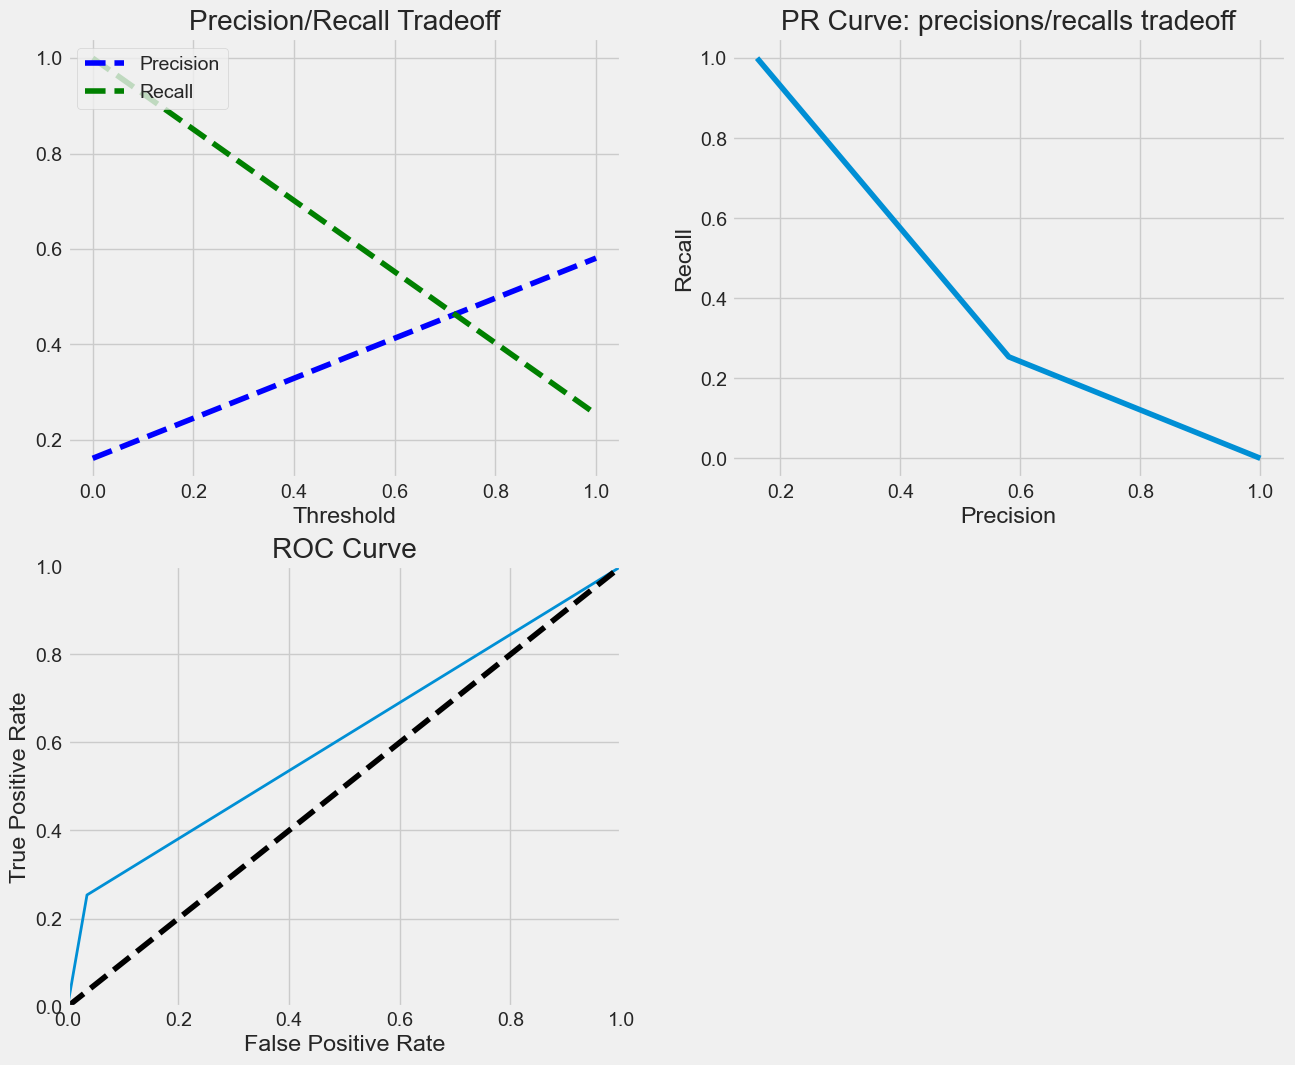

In [32]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

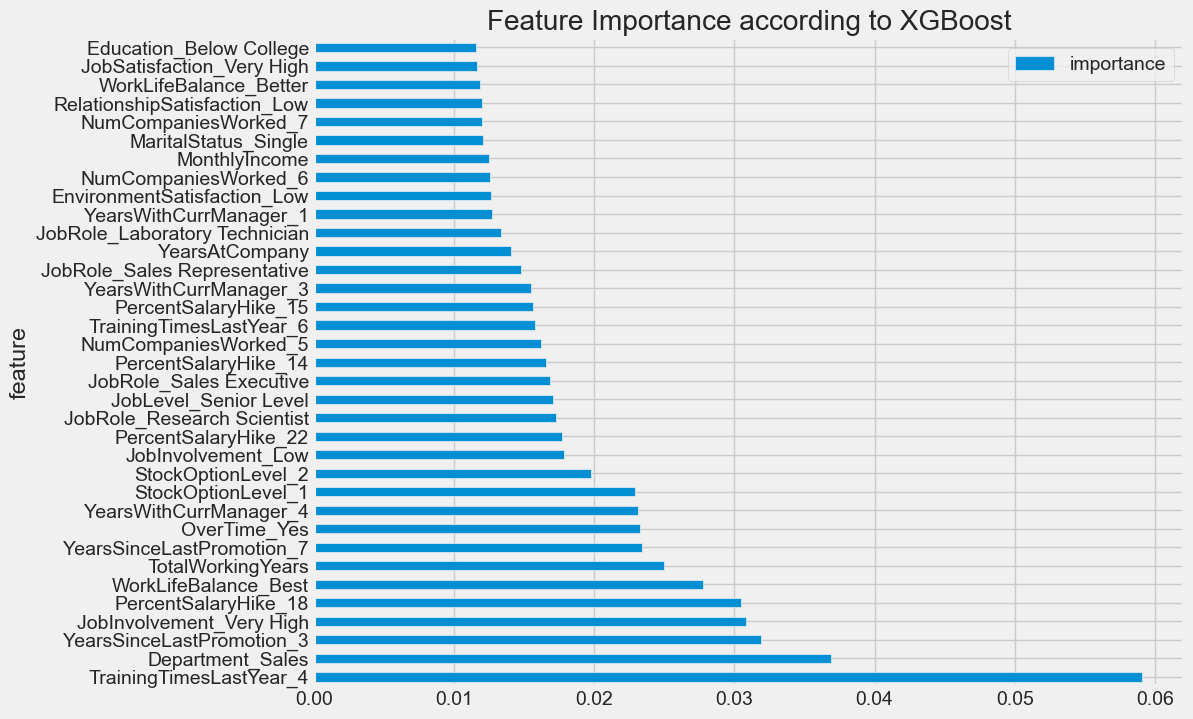

In [33]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

LIGHTGBM CLASSIFIER

In [34]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

evaluate(lgb_clf, X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0  

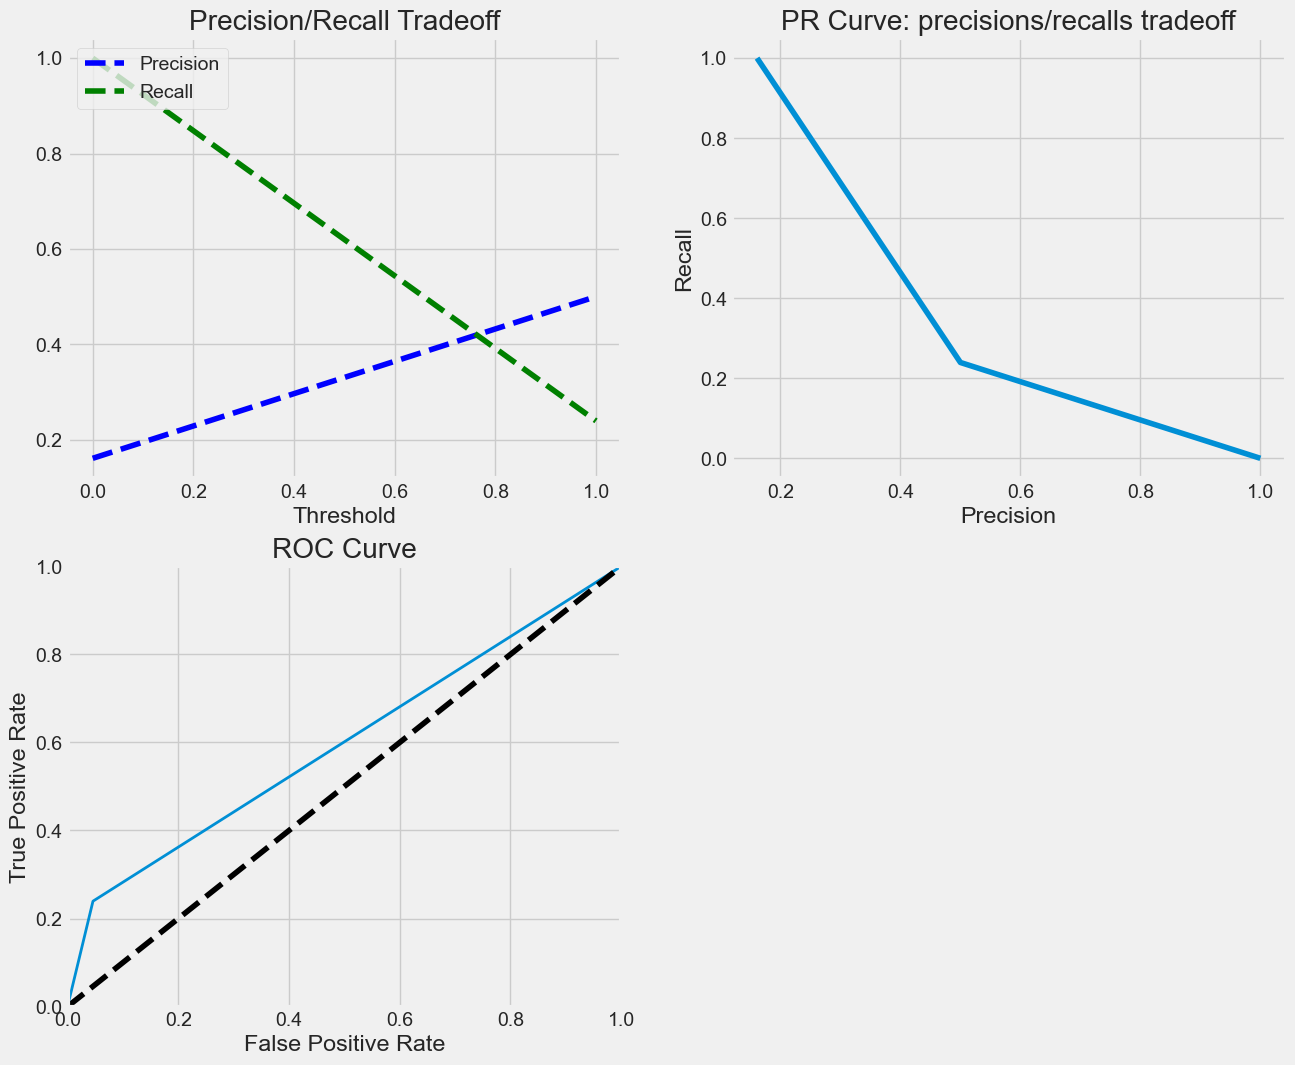

In [35]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [36]:
scores_dict['LightGBM'] = {
        'Train': roc_auc_score(y_train, lgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lgb_clf.predict(X_test)),
    }

CATBOOST CLASSIFIER

In [37]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 16 150]]
ACCURACY SCORE:
0.9845
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.981797    1.000000  0.984451     0.990899      0.984734
recall       1.000000    0.903614  0.984451     0.951807      0.984451
f1-score     0.990815    0.949367  0.984451     0.970091      0.984129
support    863.000000  166.000000  0.984451  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[363   7]
 [ 59  12]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.860190   0.631579   0.85034    0.745884      0.823384
recall       0.981081   0.169014   0.85034    0.575048      0.850340
f1-score     0.916667   0.266667   0.85034    0.591667      0.812018
support    370.000000  71.000000   0.85034  441.000000    441.000000


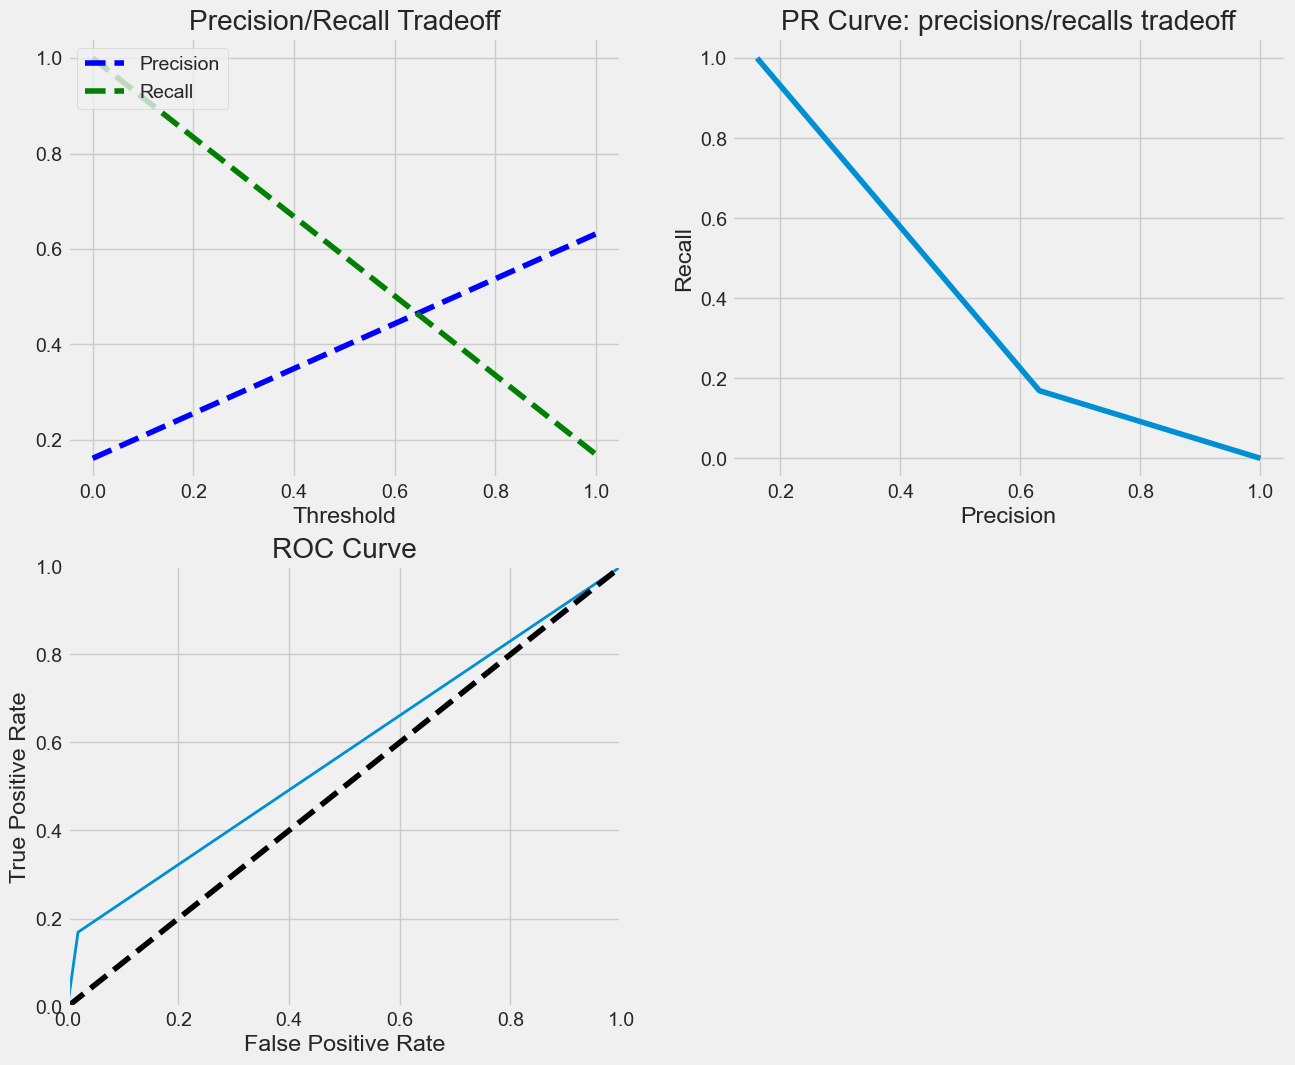

In [38]:
precisions, recalls, thresholds = precision_recall_curve(y_test, cb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [39]:
scores_dict['CatBoost'] = {
        'Train': roc_auc_score(y_train, cb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, cb_clf.predict(X_test)),
    }

ADABOOST CLASSIFIER

In [40]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[851  12]
 [ 99  67]]
ACCURACY SCORE:
0.8921
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.895789    0.848101  0.892128     0.871945      0.888096
recall       0.986095    0.403614  0.892128     0.694855      0.892128
f1-score     0.938776    0.546939  0.892128     0.742857      0.875564
support    863.000000  166.000000  0.892128  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[350  20]
 [ 55  16]]
ACCURACY SCORE:
0.8299
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864198   0.444444  0.829932    0.654321      0.796618
recall       0.945946   0.225352  0.829932    0.585649      0.829932
f1-score     0.903226   0.299065  0.829932    0.601146      0.805957
support    370.000000  71.000000  0.829932  441.000000    441.000000


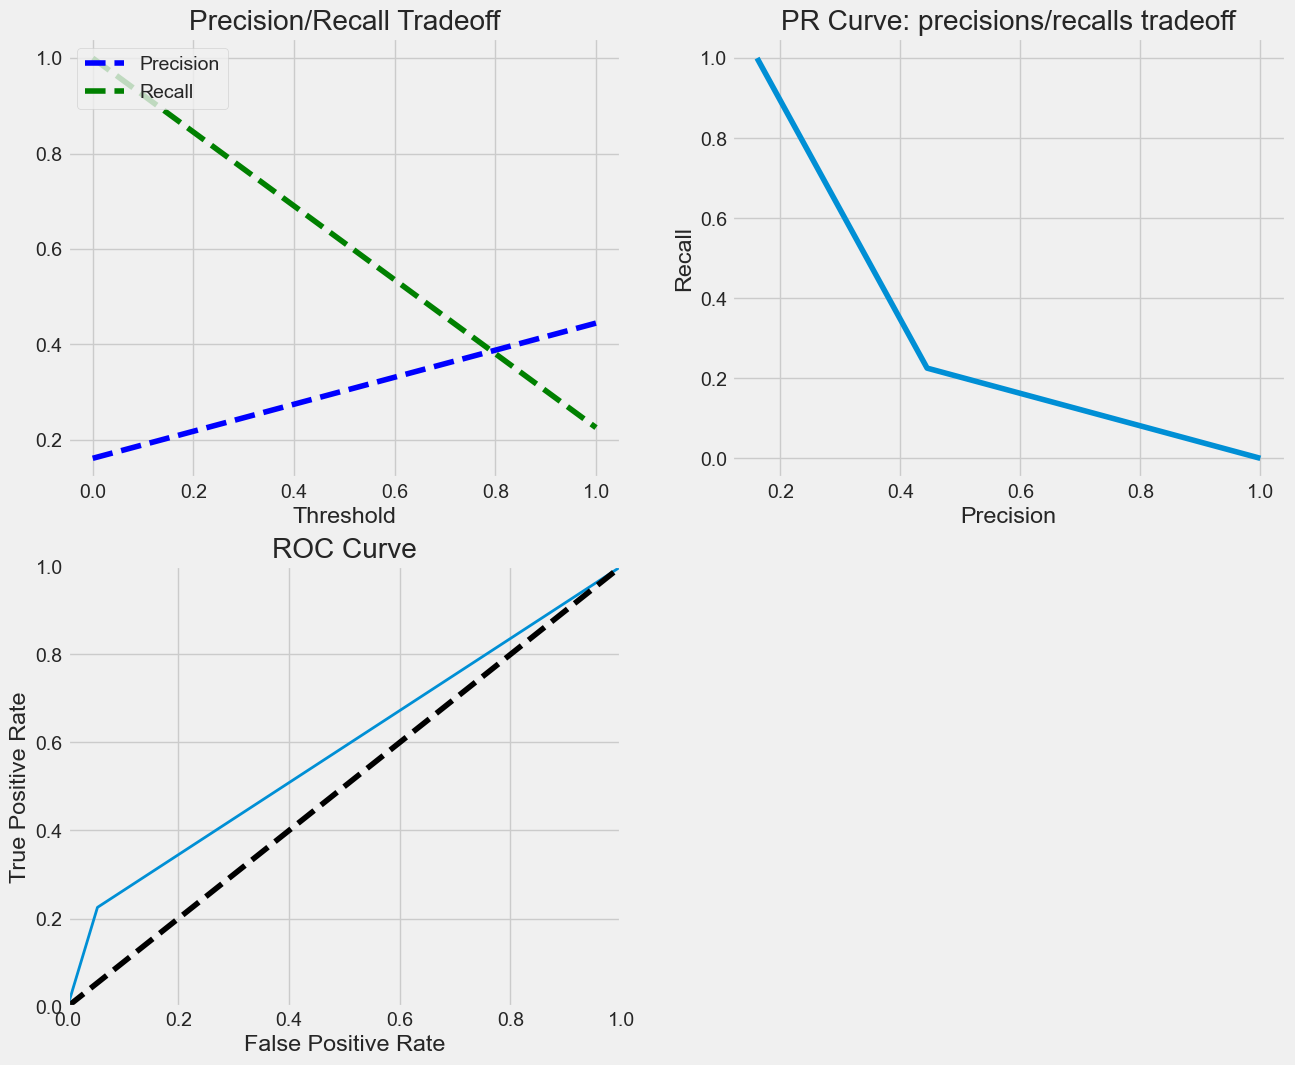

In [41]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [42]:
scores_dict['AdaBoost'] = {
        'Train': roc_auc_score(y_train, ab_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, ab_clf.predict(X_test)),
    }

COMPARING MODEL PERFORMANCE

In [43]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'LightGBM': lgb_clf,
    'CatBoost': cb_clf,
    'AdaBoost': ab_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.547
XGBOOST                        roc_auc_score: 0.609
LOGISTIC REGRESSION            roc_auc_score: 0.550
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500
LIGHTGBM                       roc_auc_score: 0.597
CATBOOST                       roc_auc_score: 0.575
ADABOOST                       roc_auc_score: 0.586


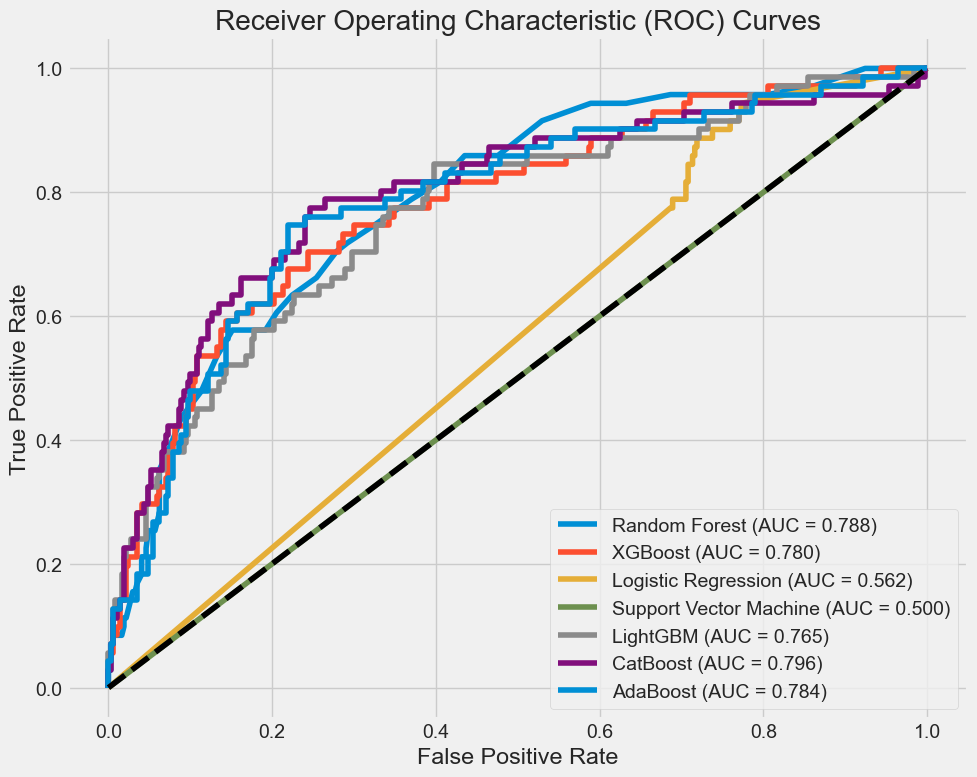

In [44]:
plt.figure(figsize=(10, 8))

# Iterate through each model
for model_name, model in ml_models.items():
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        # Predict probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict
        y_pred_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict(X_test)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    
    # Compute AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()